In [1]:
import numpy as np
import pandas as pd 
import os
import copy
import warnings
import cv2
import matplotlib.pylab as plt
import seaborn as sns

from keras.preprocessing.image import load_img, img_to_array
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from math import ceil
from tensorflow.keras.preprocessing import image

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
width = 176 
height = 208 

label_to_class = {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}

class_to_label = {v: k for k, v in label_to_class.items()}
n_classes = len(label_to_class)

def get_images(dir_name='/Users/robertklopsch/Downloads/Alzheimer_s Dataset', label_to_class=label_to_class):

    Images = []
    Classes = []
    
    for images in ['/train','/test']:
        for label_name in os.listdir(dir_name+str(images)):
            if label_name != ".DS_Store":
                cls = label_to_class[label_name]
                for img_name in os.listdir('/'.join([dir_name+str(images), label_name])):
                    img = load_img('/'.join([dir_name+str(images), label_name, img_name]), target_size=(width, height))
                    img = img_to_array(img)
                    Images.append(img)
                    Classes.append(cls)
            
    Images = np.array(Images, dtype=np.float32)
    Classes = np.array(Classes, dtype=np.float32)
    Images, Classes = shuffle(Images, Classes, random_state=0)
    
    return Images, Classes

In [3]:
Images, Classes = get_images()
Images.shape, Classes.shape

((6400, 176, 208, 3), (6400,))

In [28]:
def img2np(dir_name, label,size = (75, 64)):  
    for images in ['/train','/test']:
        for label_name in os.listdir(dir_name+str(images)):
            if(label_name==label):
                for img_name in os.listdir('/'.join([dir_name+str(images), label_name])):
                    img = load_img('/'.join([dir_name+str(images), label_name, img_name]), target_size = size, color_mode = 'grayscale')
                    img_ts = img_to_array(img)
                    img_ts = [img_ts.ravel()]
                    try:
                        full_mat = np.concatenate((full_mat, img_ts))
                    except UnboundLocalError: 
                        full_mat = img_ts
    return full_mat

In [29]:
MildDemented_images = img2np('/Users/robertklopsch/Downloads/Alzheimer_s Dataset','MildDemented')
ModerateDemented_images = img2np('/Users/robertklopsch/Downloads/Alzheimer_s Dataset','ModerateDemented')
NonDemented_images = img2np('/Users/robertklopsch/Downloads/Alzheimer_s Dataset','NonDemented')
VeryMildDemented_images = img2np('/Users/robertklopsch/Downloads/Alzheimer_s Dataset','VeryMildDemented')

In [30]:
def find_mean_img(full_mat, title, size = (75, 64)):
    mean_img = np.mean(full_mat, axis = 0)
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    #plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

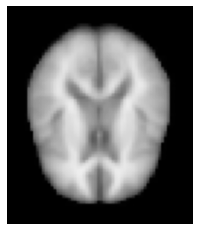

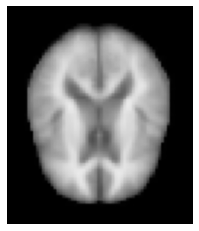

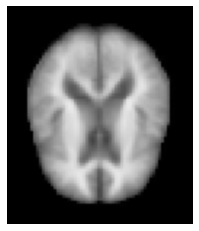

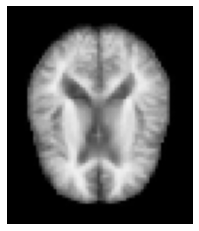

In [31]:
NonDemented_mean = find_mean_img(NonDemented_images, 'NonDemented')
VeryMildDemented_mean = find_mean_img(VeryMildDemented_images, 'VeryMildDemented')
MildDemented_mean = find_mean_img(MildDemented_images, 'MildDemented')
ModerateDemented_mean = find_mean_img(ModerateDemented_images, 'ModerateDemented')